In [69]:
import spacy
from spacy.tokens import Doc
import sddk
import pandas as pd
import re
import matplotlib.pyplot as plt

In [15]:
nlp = spacy.load('la_core_web_lg')

# Explore metadata

In [2]:
ids_filenames_df = pd.read_csv("../data/ids_filenames_df.csv")
ids_filenames_df.head(5)

,Unnamed: 0,id,filenames_list
0,0,1031760,"['Bacon,_Francis_-_Instauratio_magna__London_1..."
1,1,1085290,"['Linden,_Johannes_Antonides_van_der_-_Lindeni..."
2,2,1285853,"['de_Conde,_Ioannes_Baptista_-_Aphorismi_seu_a..."
3,3,1285854,"['van_Poort,_Henricus_-_Hippocratis_Aphorismi_..."
4,4,1285855,"['Hippocrates_&_Denisot,_Gérard_-_Hippocratis_..."


In [55]:
x = "Bacon rererere_1620_pdf.txt"
int(re.search("\d{4}", x).group())

1620

In [57]:
def get_year(x):
    try:
        year = int(re.search("\d{4}", x).group())
    except:
        year = None
    return year
ids_filenames_df["year"] = ids_filenames_df["filenames_list"].apply(get_year)

In [67]:
ids_filenames_df["year"].between(1400, 1800).sum()

937

In [148]:
ids_filenames_df.head(5)

,Unnamed: 0,id,filenames_list,year
0,0,1031760,"['Bacon,_Francis_-_Instauratio_magna__London_1...",1620.0
1,1,1085290,"['Linden,_Johannes_Antonides_van_der_-_Lindeni...",1686.0
2,2,1285853,"['de_Conde,_Ioannes_Baptista_-_Aphorismi_seu_a...",1647.0
3,3,1285854,"['van_Poort,_Henricus_-_Hippocratis_Aphorismi_...",1657.0
4,4,1285855,"['Hippocrates_&_Denisot,_Gérard_-_Hippocratis_...",1634.0


In [68]:
ids_filenames_df["year"].between(1517, 1716).sum()

667

(1460.0, 1930.0)

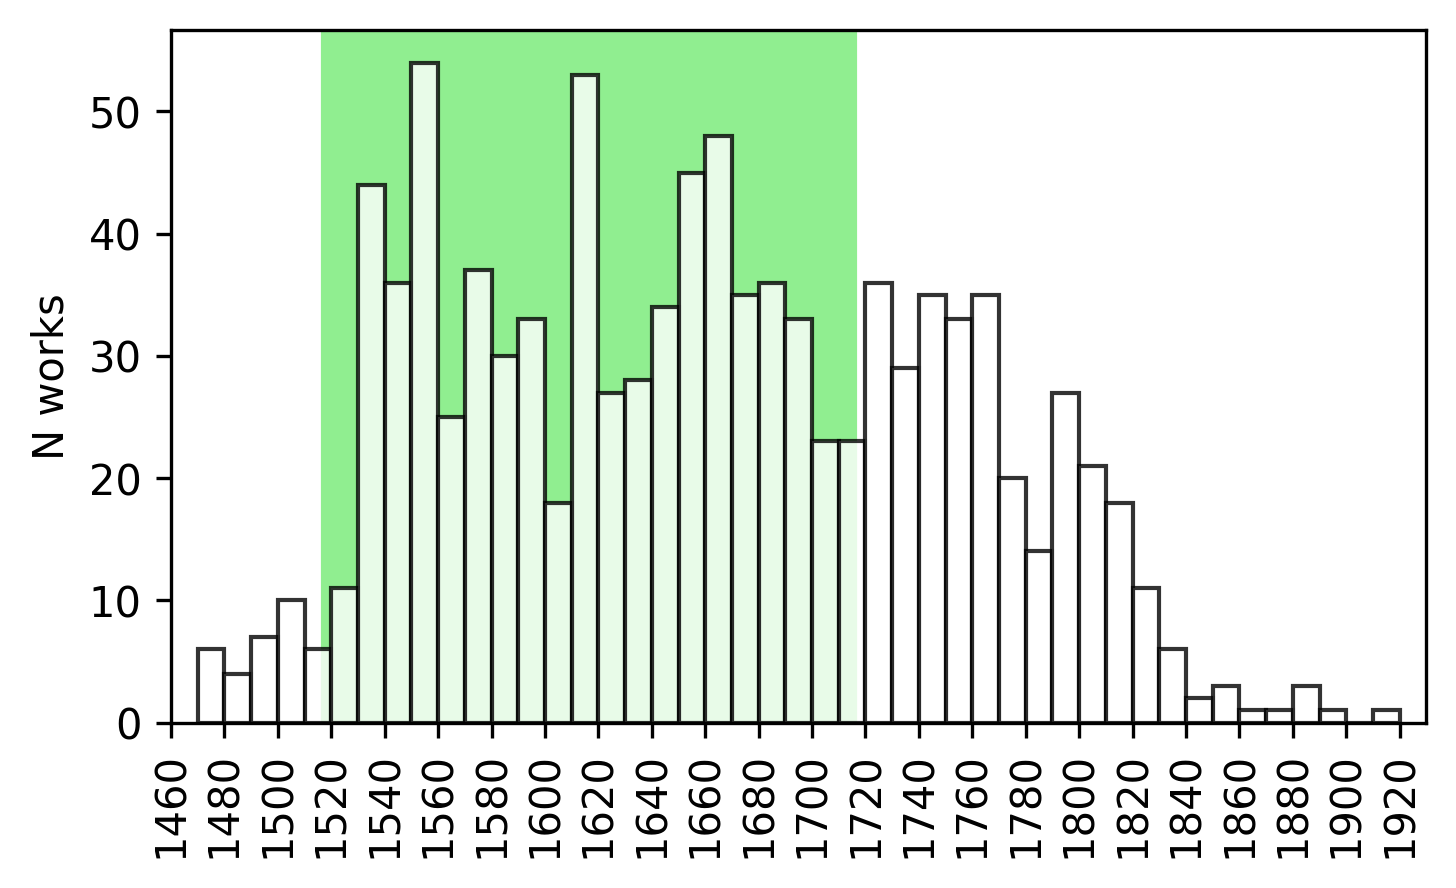

In [149]:
fig, ax = plt.subplots(figsize=(5.4, 3), dpi=300)
ax.axvspan(1517, 1716, color="lightgreen")
ids_filenames_df["year"].plot.hist(bins=range(1470,1930,10), ec="black", color="white", alpha=0.8, ax=ax)
ax.set_xticks(range(1460,1960,20))
ax.set_xticklabels([str(n) for n in range(1460,1960,20)], rotation=90)
ax.set_ylabel("N works")
ax.set_xlim(1460, 1930)


In [94]:
fig.savefig("../figures/noscemus_works_tempdist.png")

# Load & Explore Spacy Docs

In [3]:
s = sddk.cloudSession(provider="sciencedata.dk", shared_folder_name="TOME/DATA/NOSCEMUS", owner="kase@zcu.cz")

connection with shared folder established with you as its ordinary user
endpoint variable has been configured to: https://sciencedata.dk/sharingout/kase%40zcu.cz/TOME/DATA/NOSCEMUS/


In [146]:
target_folder_name = "noscemus_spacyjsons_v1"
jsonfiles_list = s.list_filenames(target_folder_name, "json")
jsonfiles_list[:10]

['1031760.json',
 '1085290.json',
 '1285853.json',
 '1285854.json',
 '1285855.json',
 '1285856.json',
 '1365811.json',
 '1370560.json',
 '1378359.json',
 '1424044.json']

In [147]:
len(jsonfiles_list)

1007

In [134]:
%%time
def filename_to_doc(filename, dir=target_folder_name):
    doc_json = s.read_file(dir + "/" + filename, "dict")
    doc = Doc(nlp.vocab).from_json(doc_json)
    return doc

In [135]:
doc = filename_to_doc(jsonfiles_list[1])

In [136]:
doc_data = {}
doc_data["characters_n"] = len(doc.text)
doc_data["tokens_n"] = len([t for t in doc])

In [137]:
doc_data

{'characters_n': 2930782, 'tokens_n': 572944}

In [125]:
for ent in doc.ents[:20]:
    print(ent.text)

Georg Abraham
Lindenius
Renovatus
Medicis Lindenius
Renqvatus
Johannis
Antonidae
Linden
Catalogum
Authores
Cynosuram
Rerum
Thematum
Vitae
Adscita
Medicis
Anne
Lxii
Continuati
Norimberg


In [114]:
all_lemmata = []
for token in doc:
    all_lemmata.append((token.text, token.lemma_, token.pos_))

In [116]:
all_lemmata[200:400]

[('Ord.', 'Oard.s', 'VERB'),
 ('&', '&', 'PUNCT'),
 ('Academic', 'academic', 'VERB'),
 ('.', '.', 'PUNCT'),
 ('Curios', 'Curii', 'NOUN'),
 ('.', '.', 'PUNCT'),
 ('dict', 'dict', 'VERB'),
 ('.', '.', 'PUNCT'),
 ('Chiron', 'Chiron', 'PROPN'),
 ('.', '.', 'PUNCT'),
 ('Cum', 'cum', 'SCONJ'),
 ('Gratia', 'Gratia', 'NOUN'),
 ('&', '&', 'PUNCT'),
 ('Privilegio', 'Privilegium', 'NOUN'),
 ('S.', 'S.', ''),
 ('C.', 'C.arcus', 'PROPN'),
 ('Majest', 'Majest', 'PROPN'),
 ('.', '.', 'PUNCT'),
 ('Ooabvv', 'Ooabvv', 'NUM'),
 ('-', '-', 'PUNCT'),
 ('ii', 'is', 'NUM'),
 ('Norimbergae', 'Norimbergaa', 'PROPN'),
 (',', ',', 'PUNCT'),
 ('Impensis', 'impensis', 'NOUN'),
 ('Johannis', 'Johann', 'PROPN'),
 ('Georgii', 'Georgius', 'PROPN'),
 ('Endteri', 'Endteri', 'PROPN'),
 ('.', '.', 'PUNCT'),
 ('Anno', 'Annus', 'NOUN'),
 ('Christi', 'Christus', 'PROPN'),
 ('M.', 'M.', 'PROPN'),
 ('Dc', 'Dc', 'ADV'),
 ('.', '.', 'PUNCT'),
 ('Lxxxvi', 'Lxxxvi', 'PROPN'),
 ('.', '.', 'PUNCT'),
 ('Reverendissimo', 'Reverendissi

In [27]:
all_sents_lemmata = []
for sent in doc.sents:
    sent_lemmata = []
    for token in sent:
        #if token.pos_ in ["NOUN", "VERB", "ADJ"]:
        sent_lemmata.append((token.text, token.lemma_, token.tag_))
    all_sents_lemmata.append(sent_lemmata)

In [28]:
all_sents_lemmata[:10]

[[('Georg', 'Georg', 'proper_noun'),
  ('Abraham', 'Abraham', 'proper_noun'),
  ('Mercklini', 'Mercklinus', 'proper_noun'),
  ('Lindenius', 'Lindenius', 'proper_noun'),
  ('Renovatus', 'Renovatus', 'proper_noun'),
  ('De', 'De', 'ADP'),
  ('Scriptis', 'Scriptis', 'adjective'),
  ('Medicis', 'Medica', 'noun'),
  ('Lindenius', 'Lindenius', 'proper_noun'),
  ('Renqvatus', 'Renqvatus', 'proper_noun'),
  (',', ',', 'punc'),
  ('Ve', 'Ue', 'pronoun'),
  ('S1', 'S1', 'adverb'),
  ('Johannis', 'Johann', 'proper_noun'),
  ('Antonidae', 'Antonidae', 'proper_noun'),
  ('van', 'van', 'proper_noun'),
  ('der', 'der', 'adverb'),
  ('Linden', 'Linden', 'proper_noun'),
  ('De', 'de', 'ADP'),
  ('Scria', 'Scria', 'proper_noun'),
  ('Iaumedicis', 'Iaumedicus', 'noun'),
  ('Libridvo', 'Libridvo', 'proper_noun'),
  ('.', '.', 'punc')],
 [('Uorum', 'Uorum', 'noun'),
  ('Prior', 'Prior', 'adjective'),
  (',', ',', 'punc'),
  ('Omnium', 'omnium', 'adjective'),
  (',', ',', 'punc'),
  ('Tam', 'tam', 'adverb')

In [138]:
latinwn = pd.read_csv("https://raw.githubusercontent.com/CIRCSE/latinWordnet-revision/master/LiLa_LatinWordnet.csv")

In [139]:
latinwn.head(5)

,id,lemma,type,lila_uri,id_synset,definition
0,90942,"a, aa",LEMMA,http://lila-erc.eu/data/id/lemma/90942,http://wordnet-rdf.princeton.edu/wn30/06831177-n,the 1st letter of the Roman alphabet
1,86826,abactio,LEMMA,http://lila-erc.eu/data/id/lemma/86826,http://wordnet-rdf.princeton.edu/wn30/00391599-n,the act of removing
2,86828,abactor,LEMMA,http://lila-erc.eu/data/id/lemma/86828,http://wordnet-rdf.princeton.edu/wn30/10544480-n,someone who steals livestock (especially cattle)
3,91165,abactus,LEMMA,http://lila-erc.eu/data/id/lemma/91165,http://wordnet-rdf.princeton.edu/wn30/00780889-n,the act of taking something from someone unlaw...
4,86833,abaculus,LEMMA,http://lila-erc.eu/data/id/lemma/86833,http://wordnet-rdf.princeton.edu/wn30/04435180-n,a flat thin rectangular slab (as of fired clay...
